<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_06/lab_06.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [ ]:
  import os
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
from IPython.display import display, Latex
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_06/data/anscombe.csv")

df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

PROBLEMA 1)

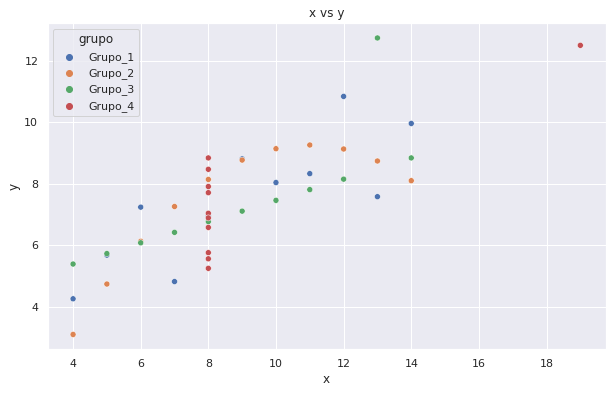

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot( 
    x='x',
    y='y',
    hue='grupo',
    data=df,
)
plt.title('x vs y')
plt.show()

Se puede apreciar de que los grupos son distintos entre sí

PROBLEMA 2)

In [ ]:
grupo1 = df[df["grupo"] == "Grupo_1"]
grupo2 = df[df["grupo"] == "Grupo_2"]
grupo3 = df[df["grupo"] == "Grupo_3"]
grupo4 = df[df["grupo"] == "Grupo_4"]

grupo1.describe()


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [ ]:
grupo2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [ ]:
grupo3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [ ]:
grupo4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Se puede ver que lo grupos tienen en común algunos datos estadísticos, como por ejemplo la media 
                                                                                                                                                                                                                                                 






PROBLEMA 3)

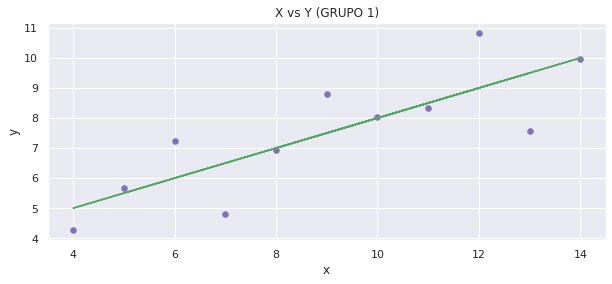

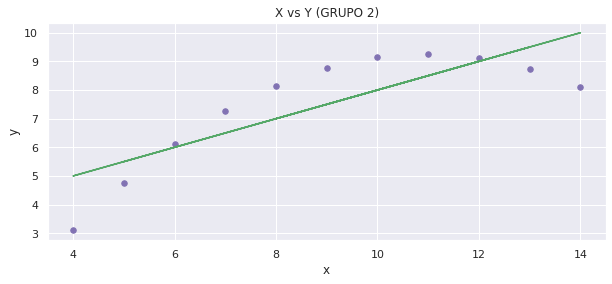

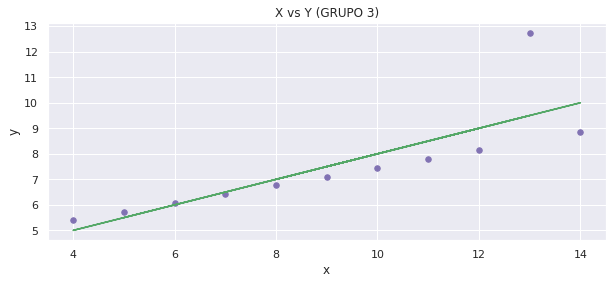

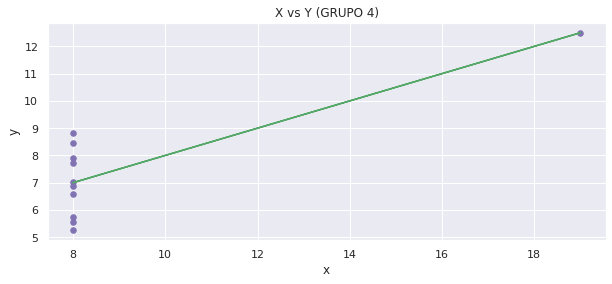

In [ ]:
x1 = grupo1["x"].to_numpy()
y1 = grupo1["y"].to_numpy()

x2 = grupo2["x"].to_numpy()
y2 = grupo2["y"].to_numpy()

x3 = grupo3["x"].to_numpy()
y3 = grupo3["y"].to_numpy()

x4 = grupo4["x"].to_numpy()
y4 = grupo4["y"].to_numpy()

def coef_estimado(x, y):
    x_prom = np.mean(x)
    y_prom = np.mean(y)
    beta_1 = sum((x-x_prom)*(y-y_prom))/sum((x-x_prom)**2)
    beta_0 = y_prom-beta_1*x_prom
    return (beta_0, beta_1)

def regresion_lineal(x, y, yhat, i):
    plt.figure(figsize=(10,4))
    plt.scatter(x, y, color = "m",marker = "o", s = 30)
    plt.plot(x, yhat, color = "g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("X vs Y (GRUPO "+str(i)+")")
    plt.show()

# Asignamos los coef. estimados para cada grupo
b0_1 = coef_estimado(x1, y1)[0] 
b1_1 = coef_estimado(x1, y1)[1]
b0_2 = coef_estimado(x2, y2)[0] 
b1_2 = coef_estimado(x2, y2)[1]
b0_3 = coef_estimado(x3, y3)[0] 
b1_3 = coef_estimado(x3, y3)[1]
b0_4 = coef_estimado(x4, y4)[0] 
b1_4 = coef_estimado(x4, y4)[1]

# Asignamos las predicciones para cada grupo
pre1 = b0_1 + b1_1*x1
pre2 = b0_2 + b1_2*x2
pre3 = b0_3 + b1_3*x3
pre4 = b0_4 + b1_4*x4

# Mostramos el gráfico correspondiente a la regresion lineal de cada grupo
regresion_lineal(x1, y1, pre1, 1)
regresion_lineal(x2, y2, pre2, 2)
regresion_lineal(x3, y3, pre3, 3)
regresion_lineal(x4, y4, pre4, 4)

Se puede notar que todos los grupos tienen el mismo ajuste lineal

PROBLEMA 4)

In [ ]:
# Métrica: mean absolute error (MAE)
def mae(y, yhat) -> float:
    metrica = (sum(abs(y-yhat)))/y.shape[0]
    return metrica

# Métrica: root mean squared error (RMSE)
def rmse(y, yhat) -> float:
    metrica = np.sqrt((sum((y-yhat)**2))/y.shape[0])
    return metrica

# Métrica: mean absolute percentage error (MAPE)
def mape(y, yhat) -> float:
    metrica = sum(abs((y-yhat)/y))/y.shape[0]
    return metrica

# Métrica: symmetric mean absolute percentage error (SMAPE)
def smape(y, yhat) -> float:
    metrica = (1/y.shape[0])*sum(abs(y-yhat)/((abs(y)+abs(yhat))*2))
    return metrica

# Métrica: symmetric mean squared error (SMAPE)
def mse(y, yhat) -> float:
  return mean_squared_error(y, yhat)

# Métrica: symmetric mean absolute percentage error (SMAPE)  

# Asignamos el valor de cada metrica en cada grupo, ordenado de grupo 1 hasta el 4
print("Métrica Mae:")
print(mae(y1, pre1))
print(mae(y2, pre2))
print(mae(y3, pre3))
print(mae(y4, pre4))
print(" ")
print("Métrica Rmse:")
print(rmse(y1, pre1))
print(rmse(y2, pre2))
print(rmse(y3, pre3))
print(rmse(y4, pre4))
print(" ")
print("Métrica Mape:")
print(mape(y1, pre1))
print(mape(y2, pre2))
print(mape(y3, pre3))
print(mape(y4, pre4))
print(" ")
print("Métrica Smape:")
print(smape(y1, pre1))
print(smape(y2, pre2))
print(smape(y3, pre3))
print(smape(y4, pre4))
print(" ")
print("Métrica Mse:")
print(mse(y1, pre1))
print(mse(y2, pre2))
print(mse(y3, pre3))
print(mse(y4, pre4))
print(" ")

def rsquared(y, yhat) -> float:
    r2 = 1-(sum((y-yhat)**2)/(sum((yhat-np.mean(y))**2)+sum((y-yhat)**2))) 
    return r2
print ("R2:")
print (rsquared(y1, pre1))
print (rsquared(y2, pre2))
print (rsquared(y3, pre3))
print (rsquared(y4, pre4))

Métrica Mae:
0.8374049586776859
0.9679338842975209
0.7159669421487604
0.902727272727273
 
Métrica Rmse:
1.1185497916336296
1.1191023557497446
1.118285693623049
1.1177286221293938
 
Métrica Mape:
0.12125783477322831
0.1569518620016047
0.07970727611180317
0.13473848647069778
 
Métrica Smape:
0.0291728212760583
0.035956131725877416
0.02036053329990134
0.03258473619404252
 
Métrica Mse:
1.2511536363636362
1.2523900826446281
1.2505628925619836
1.249317272727273
 
R2:
0.666542459508775
0.6662420337274844
0.6663240410665592
0.6667072568984653


PROBLEMA 5)

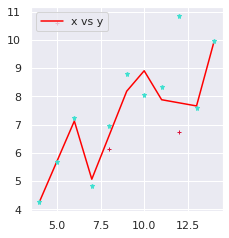

In [ ]:
x_1 = grupo1["x"]
y_1 = grupo1["y"]
x_2 = grupo2["x"]
y_2 = grupo2["y"]
x_3 = grupo3["x"]
y_3 = grupo3["y"]
x_4 = grupo4["x"]
y_4 = grupo4["y"]

def estimacion_polinomial(x,y,grad):
  x_aux = x
  y_aux = y
  X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
  X_train = X_train.values.reshape([X_train.values.shape[0],1])
  X_test = X_test.values.reshape([X_test.values.shape[0],1])
  for i in range(1,grad+1):
    poly_features = PolynomialFeatures(degree = i)
    X_poly = poly_features.fit_transform(X_train)
    Xt_poly = poly_features.fit_transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_train)
    pred = poly_model.predict(X_poly)
    pred2 = poly_model.predict(Xt_poly)
    xt, yt = zip(*sorted(zip(X_test,pred2))) 
    X, y = zip(*sorted(zip(X_train,pred)))
  plt.subplot(2,3,grad)
  plt.plot(X, y, "-", color="red", label="x vs y", markersize=2)
  plt.plot(xt, yt, "+", color="crimson", markersize=4)
  plt.plot(x_aux, y_aux, "*", color="turquoise", markersize=5)
  plt.legend(loc=2)

estimacion_polinomial(x_1,y_1,6)

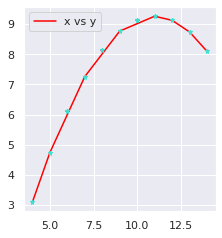

In [ ]:
estimacion_polinomial(x_2,y_2,6)

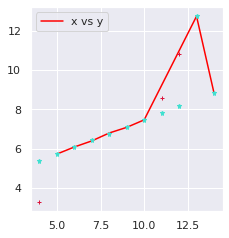

In [ ]:
estimacion_polinomial(x_3,y_3,6)

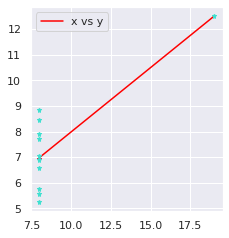

In [ ]:
estimacion_polinomial(x_4,y_4,6)

Vemos que el ajuste polinomial, nos da una predicción algo más certera respecto a la lineal a rasgos generales. Sin embargo, los grupos 3 y 4 podrían mejorar si eliminamos sus puntos más alejados y les aplicamos un ajuste lineal. Por último, evaluaremos cada caso de acuerdo a las métricas de error

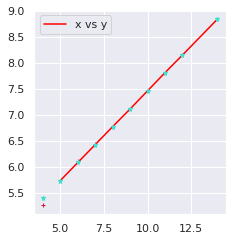

In [ ]:
# Eliminamos punto conflictivo
x_3 = grupo3["x"].drop(24, axis=0)
y_3 = grupo3["y"].drop(24, axis=0)

estimacion_polinomial(x_3,y_3,6)

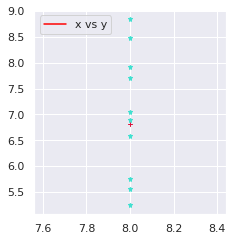

In [ ]:
# Eliminamos punto conflictivo
x_4 = grupo4["x"].drop(40, axis=0)
y_4 = grupo4["y"].drop(40, axis=0)

estimacion_polinomial(x_4,y_4,6)